# Hierarchical Modelling for Object location Modelling

- Can be used in the object modeling if we have data on every time slot
- If we collect data only in specific timezone (Morning, afternoon and evening) we can use
- But there cannot have missing data . Need a way ti handle missing data
- 

In [ ]:
from bayespy import nodes
import numpy as np

n_readings = 10 #Number of readings to be generated
n_locations = 5 

#Generate some random distributions to fill in each timezone
p_location = nodes.Dirichlet(1e-1 * np.ones(n_locations),
                            plates = (n_timezone,)).random()

#Randomly choose the timezone in which the reading is being undertaken
reading_timezone_0 = nodes.Categorical(p_location,
                                    plates=(n_readings,n_timezone)).random()


In [5]:
p0 = [0.1, 0.9, 0.1, 0.9, 0.1, 0.9, 0.1, 0.9, 0.1, 0.9]
p1 = [0.1, 0.1, 0.1, 0.1, 0.1, 0.9, 0.9, 0.9, 0.9, 0.9]
p2 = [0.9, 0.9, 0.9, 0.9, 0.9, 0.1, 0.1, 0.1, 0.1, 0.1]

import numpy as np
p = np.array([p0, p1, p2])

from bayespy.utils import random
z = random.categorical([1/3, 1/3, 1/3], size=100)

x = random.bernoulli(p[z])

x[0:5]

array([[False, False, False, False, False,  True,  True,  True, False,
         True],
       [ True,  True, False,  True, False,  True, False,  True, False,
         True],
       [ True,  True, False,  True,  True, False, False, False, False,
        False],
       [ True,  True,  True, False, False, False, False, False, False,
         True],
       [False,  True, False, False, False,  True, False,  True, False,
         True]], dtype=bool)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def run(N=200, maxiter=10, seed=42, std=2.0, plot=True):

    # Use deterministic random numbers
    if seed is not None:
        np.random.seed(seed)

    #
    # Generate data
    #
    
    mu = np.array([ [0,0], [3,4], [6,0] ])

    K = 3
    p0 = np.ones(K) / K
    q = 0.9 # probability to stay in the same state
    r = (1-q)/(K-1)
    P = q*np.identity(K) + r*(np.ones((3,3))-np.identity(3))

    y = np.zeros((N,2))
    z = np.zeros(N)
    state = np.random.choice(K, p=p0)
    for n in range(N):
        z[n] = state
        y[n,:] = std*np.random.randn(2) + mu[state]
        state = np.random.choice(K, p=P[state])

    plt.figure()

    # Plot data
    plt.subplot(1,3,1)
    plt.axis('equal')
    plt.title('True classification')
    colors = [ [[1,0,0], [0,1,0], [0,0,1]][int(state)] for state in z ]
    plt.plot(y[:,0], y[:,1], 'k-', zorder=-10)
    plt.scatter(y[:,0], y[:,1], c=colors, s=40)

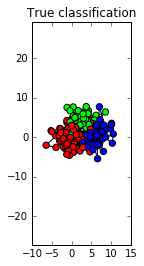

In [5]:
%matplotlib inline 
run()